Α α, Β β, Γ γ, Δ δ, Ε ε, Ζ ζ, Η η, Θ θ, Ι ι, Κ κ, Λ λ, Μ μ, Ν ν, Ξ ξ, Ο ο, Π π, Ρ ρ, Σ σ ς, Τ τ, Υ υ, Φ φ, Χ χ, Ψ ψ, Ω ω

<h1>Refactored</h1>

In [69]:
import matplotlib.pyplot as plt
import math
import scipy
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2

In [71]:
data = [-6.03,-3.60,3.57,1.84,
            3.26,-0.44,0.41,8.87,
            7.04,8.18,1.64,1.03,
            3.75,2.37,7.11,-4.82,
            9.95,4.57,8.27,5.29,
            1.78,1.00,7.10,5.44,
            0.20,5.10,3.85,8.12,
            -1.06,8.81,6.90,1.54,
            5.10,3.91,-2.05,12.37,
            7.85,9.44,4.58,6.11,
            2.55,6.85,2.87,6.95]
data.sort()

<h2>Expected value, Variance and Standard deviation Functions</h2>

In [74]:
def expected_value(x,p):
    return sum([xi*pi for xi,pi in zip(x,p)])
    
def variance(x,p):
    A = expected_value(x,p)
    return sum([(xi-A)**2*pi for xi,pi in zip(x,p)])

def standard_deviation(V):
    return math.sqrt(V);

<h2>Probability density for inspect function</h2>

In [77]:
def laplace_function(x):
    return scipy.stats.norm.cdf(x)-0.5
def P_N(a,b):
    return laplace_function(b) - laplace_function(a)

<h2>Expected value, Variance and Standard deviation</h2>

In [80]:
M = expected_value(data,[1/44]*44)
D = variance(data,[1/44]*44)
σ = standard_deviation(D)

print (f'expected value = {M}')
print (f'variance = {D}')
print (f'standard deviation = {σ}')

expected value = 4.035681818181819
variance = 16.038206353305785
standard deviation = 4.004772946535894


<h2>Intervals and data bins</h2>

In [83]:
intervals = math.ceil(1 + (3.322 * math.log10(len(data))))
interval_length = math.ceil(100 * (max(data) - min(data)) / intervals) / 100

bins = [round(max(data)-interval_length*i,2) for i in range(intervals+1)]
bins.reverse()

m = [sum(1 if x > bins[i] and x < bins[i+1] else 0 for x in data) for i in range(len(bins)-1)]
h = [round(mi/(interval_length*len(data)),2) for mi in m]

print(f'intervals = {intervals}')
print(f'interval length = {interval_length}\n')

print (f'data binning {bins}')
print(f'absolute frequency = {m}')
print (f'interval height = {h}')

intervals = 7
interval length = 2.63

data binning [-6.04, -3.41, -0.78, 1.85, 4.48, 7.11, 9.74, 12.37]
absolute frequency = [3, 2, 9, 8, 12, 7, 1]
interval height = [0.03, 0.02, 0.08, 0.07, 0.1, 0.06, 0.01]


<h2>Histogram</h2>

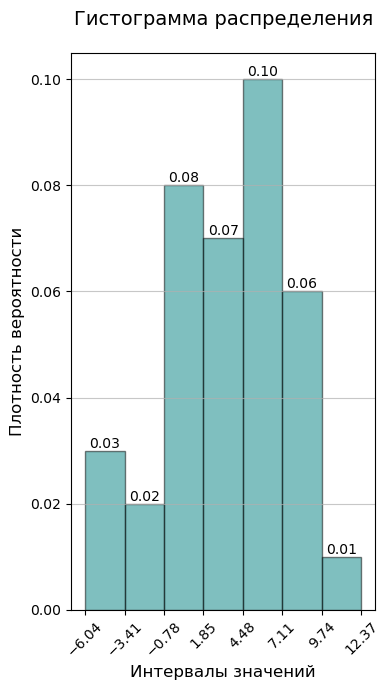

In [86]:
widths = [interval_length]*intervals
positions = [bins[i] + widths[i]/2 for i in range(len(widths))]  # Центры интервалов

plt.figure(figsize=(4, 7))

bars = plt.bar(positions, 
               h, 
               width=widths, 
               edgecolor="black", 
               linewidth=1,
               alpha=0.5,
               color="teal")

plt.xticks(bins, rotation=45)
plt.xlabel("Интервалы значений", fontsize=12)
plt.ylabel("Плотность вероятности", fontsize=12)
plt.title("Гистограмма распределения", pad=20, fontsize=14)
plt.grid(axis="y", linestyle="-", alpha=0.7)

for bar, value in zip(bars, h):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             height, 
             f"{value:.2f}", 
             ha="center",
             va="bottom")

plt.tight_layout()
plt.show()

In [87]:
p_numb_intervals = 3

bins[0] =  float(' -inf')
bins[-1] = float( 'inf')

print(f'new bins = {bins}')

new bins = [-inf, -3.41, -0.78, 1.85, 4.48, 7.11, 9.74, inf]


<h2>Interval union, experimental frequency calculation</h2>

In [89]:
temp = p_numb_intervals

tmpsum=0
intervals = []
experimental_frequency =[]
intervals.append(bins[0])

for i in range (len(m)):
    tmpsum+=m[i]
    
    if (tmpsum>5 and temp!=1):
        experimental_frequency.append(tmpsum)
        intervals.append(bins[i+1])
        tmpsum=0
        temp-=1

experimental_frequency.append(tmpsum)    
intervals.append(bins[-1])

assert len(experimental_frequency)==p_numb_intervals, "v is not match"
assert len(intervals)==p_numb_intervals+1, "v is not match"

print (f'experimental_frequency = {experimental_frequency}')
print (f'bins = {bins}')
print (f'intervals = {intervals}')

experimental_frequency = [14, 8, 20]
bins = [-inf, -3.41, -0.78, 1.85, 4.48, 7.11, 9.74, inf]
intervals = [-inf, 1.85, 4.48, inf]


<h2>χ^2</h2>

In [94]:
p = []
for i in range(p_numb_intervals):
    a = (intervals[i] - M) / σ
    b = (intervals[i+1] - M) / σ 
    p.append(P_N(a,b))
print (f'interval probabilities = {p}')

interval probabilities = [0.2926122909259875, 0.2515585846994577, 0.4558291243745548]


In [96]:
chi2_imp = sum((vi-pi*len(data))**2/(pi*len(data)) for vi,pi in zip(experimental_frequency,p))
print(f'χ^2 experimental = {chi2_imp}')

χ^2 experimental = 0.949182589733425


In [98]:
alpha = 0.05 
chi2_table = chi2.ppf(1-alpha,1)
print (f'χ^2 table = {chi2_table}')

χ^2 table = 3.841458820694124


In [102]:
if (chi2_imp<chi2_table):
    print ("нет оснований отвергать нулевую гипотезу")

нет оснований отвергать нулевую гипотезу
